**Name - NIM**

# **Week 7**


---


## Random Forest and Gradient Boosting Classifier
Today lab exercise will be using Bank Marketing Dataset
- Download the **Bank Marketing Dataset** from Elearn
- Upload the dataset to your own Github
- Import the dataset using URL from your Github

**METADATA** <br>
Age <br>
Job : type of job <br>
Marital : marital status <br>
Education <br>
Default: has credit in default? <br>
Housing: has housing loan? <br>
Loan: has personal loan? <br>
Contact: contact communication type <br>
Month: last contact month of year <br>
Day: last contact day of the week <br>
Duration: last contact duration, in seconds. Important
note: this attribute highly affects the output target (e.g., if
duration=0 then y='no'). <br>
Campaign: number of contacts performed during this campaign and for
this client (includes last contact) <br>
Pdays: number of days that passed by after the client was last
contacted from a previous campaign (999 means client was not
previously contacted) <br>
Previous: number of contacts performed before this campaign and for
this client <br>
Poutcome: outcome of the previous marketing campaign <br>
y: has the client subscribed a term deposit?

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

## Load Dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/valentraphael/Data-Mining/refs/heads/main/Bank.csv', delimiter=';')
df.sample(n=10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
2271,34,management,single,tertiary,no,171,yes,no,cellular,7,may,191,1,294,1,failure,no
2577,39,blue-collar,married,primary,no,2226,yes,no,unknown,6,may,158,1,-1,0,unknown,no
3372,32,management,single,tertiary,no,1160,yes,yes,unknown,11,jun,450,2,-1,0,unknown,no
2638,38,blue-collar,married,primary,no,290,yes,no,cellular,16,apr,283,1,-1,0,unknown,no
4470,31,technician,single,tertiary,no,1166,yes,no,unknown,3,jun,207,1,-1,0,unknown,no
1861,28,services,single,secondary,no,290,yes,no,cellular,18,may,128,1,-1,0,unknown,no
612,26,entrepreneur,single,tertiary,no,81,no,no,cellular,21,jul,262,3,-1,0,unknown,no
4440,45,blue-collar,married,primary,no,13117,no,no,unknown,11,jun,42,2,-1,0,unknown,no
1319,49,management,married,secondary,no,1623,yes,no,cellular,19,nov,1081,2,-1,0,unknown,yes
979,56,blue-collar,divorced,primary,no,3021,no,no,unknown,9,jun,419,2,-1,0,unknown,no


## Exploratory Data Analysis
Explore the data to identify patterns within the dataset. <br>
Hint: <br>
* There are no missing values, but some columns contain 'unknown' values. Decide whether it is best to drop it or not.
* The 'admin' and 'management' unique value in the job column represent similar roles, so you can combine them under a single categorical value.




In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [6]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [7]:
print(df['y'].value_counts(dropna=False))


y
no     4000
yes     521
Name: count, dtype: int64


In [8]:
for column in df.columns:
    unknown_count = df[column].value_counts().get('unknown', 0)
    print(f"Unknown count in '{column}': {unknown_count}")

Unknown count in 'age': 0
Unknown count in 'job': 38
Unknown count in 'marital': 0
Unknown count in 'education': 187
Unknown count in 'default': 0
Unknown count in 'balance': 0
Unknown count in 'housing': 0
Unknown count in 'loan': 0
Unknown count in 'contact': 1324
Unknown count in 'day': 0
Unknown count in 'month': 0
Unknown count in 'duration': 0
Unknown count in 'campaign': 0
Unknown count in 'pdays': 0
Unknown count in 'previous': 0
Unknown count in 'poutcome': 3705
Unknown count in 'y': 0


In [9]:
df['job'] = df['job'].replace('admin.', 'management')

df.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
803,57,housemaid,single,secondary,no,254,no,no,cellular,8,oct,676,1,-1,0,unknown,no
4236,31,blue-collar,married,secondary,no,92,yes,no,unknown,16,may,688,1,-1,0,unknown,yes
1152,50,management,married,secondary,no,0,no,no,cellular,4,aug,86,4,-1,0,unknown,no
2208,28,blue-collar,married,secondary,no,1325,yes,no,cellular,15,may,242,1,-1,0,unknown,no
916,36,blue-collar,married,secondary,no,13,no,no,unknown,3,jun,284,1,-1,0,unknown,no
3221,31,technician,married,secondary,no,0,no,yes,cellular,19,aug,144,4,-1,0,unknown,no
2145,38,unemployed,married,primary,no,-363,no,no,unknown,12,jun,340,2,-1,0,unknown,no
965,33,management,single,tertiary,no,3143,no,no,cellular,29,jun,421,2,-1,0,unknown,yes
3995,37,blue-collar,divorced,secondary,no,0,yes,no,cellular,21,apr,146,4,-1,0,unknown,yes
2495,38,self-employed,single,tertiary,no,917,yes,no,unknown,23,may,260,1,-1,0,unknown,no


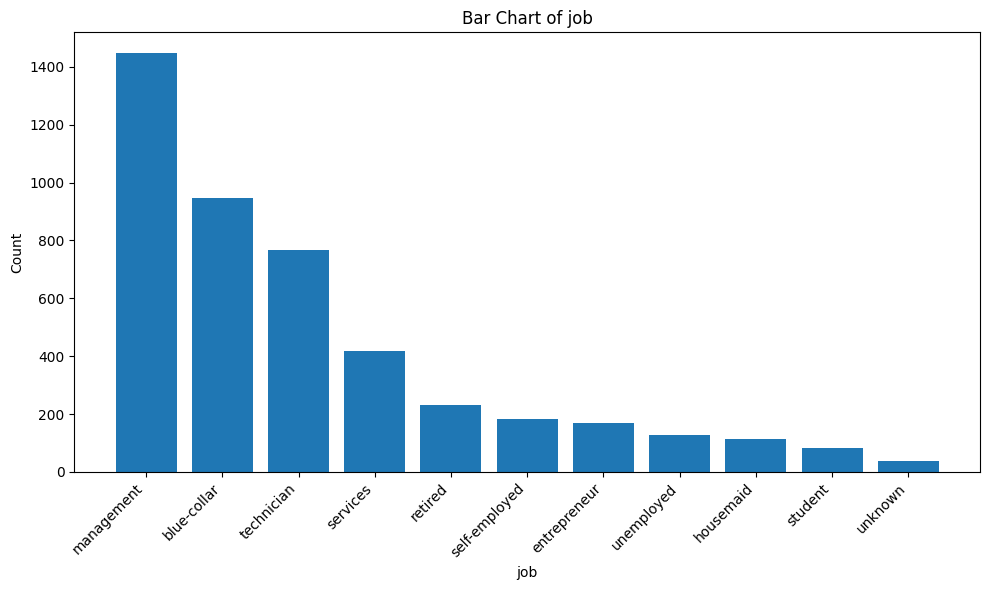

In [10]:
column_name = 'job'

value_counts = df[column_name].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(value_counts.index, value_counts.values)
plt.xlabel(column_name)
plt.ylabel('Count')
plt.title(f'Bar Chart of {column_name}')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [11]:
label_encoder = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column].astype(str))

df.sample(n = 5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1475,57,3,1,2,0,1172,0,0,2,18,6,26,1,-1,0,3,0
4057,28,0,1,1,0,100,1,1,2,27,8,132,2,-1,0,3,0
678,49,6,2,1,0,133,0,0,2,11,6,319,6,-1,0,3,0
400,35,8,0,2,0,4515,1,0,0,19,9,98,2,-1,0,3,0
2151,51,0,0,0,0,602,1,0,0,11,8,347,1,284,2,0,0


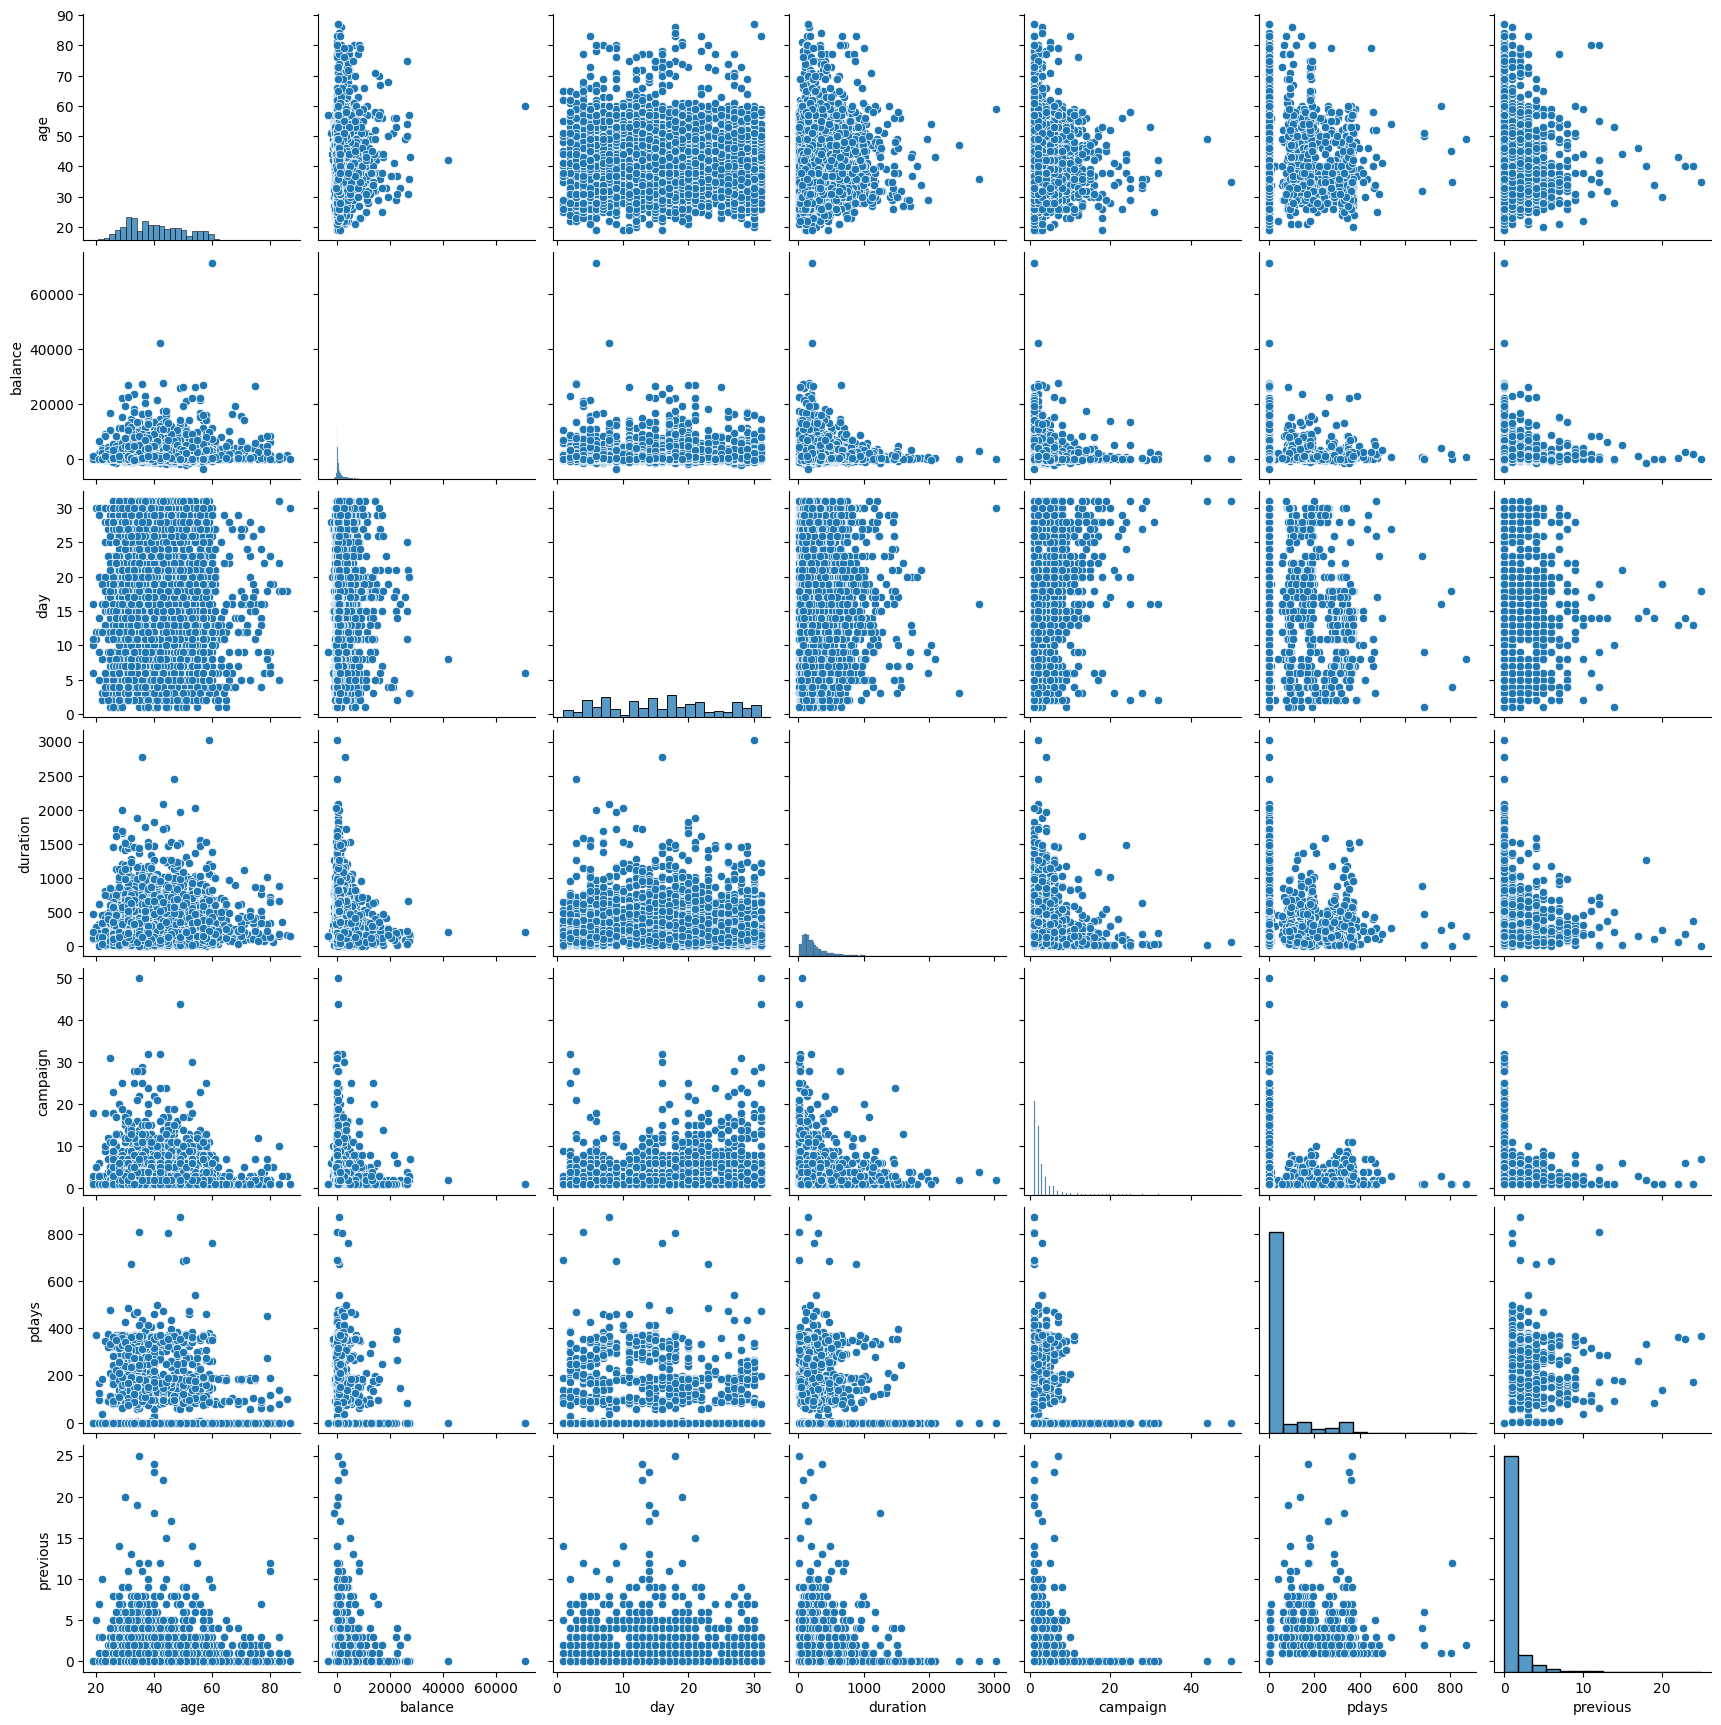

In [12]:
numerical_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

sns.pairplot(df[numerical_cols])
plt.show()

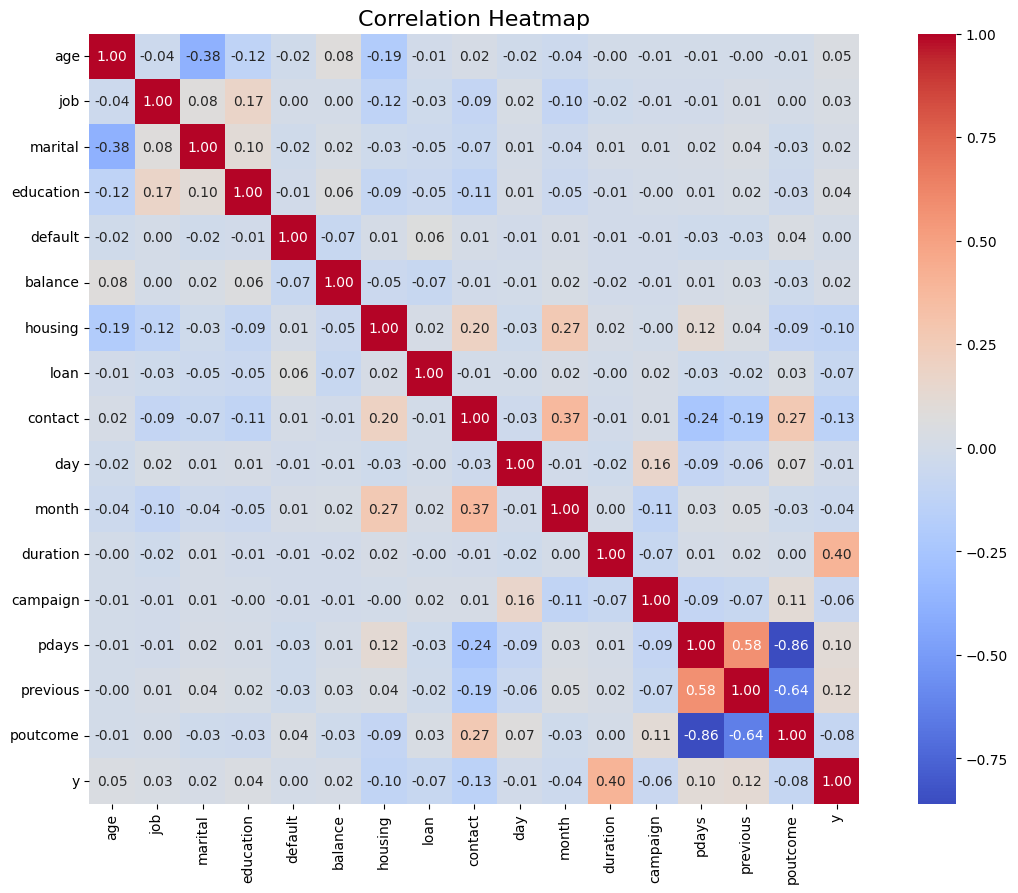

In [13]:
correlation_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()


## Machine Learning (Split Data)

In [14]:
X = df.drop(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'campaign', 'poutcome', 'y'], axis = 1)
y = df['y']

In [15]:
from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN(random_state=0)

X, y = smote_enn.fit_resample(X, y)

print("Class distribution after SMOTEEN:")
print(y.value_counts())

# SMOTE is a valuable technique to use with the Bank Marketing dataset
# to address the class imbalance problem and improve the performance of machine learning models,
# particularly in predicting the minority class (customers who subscribed to a term deposit).

Class distribution after SMOTEEN:
y
0    2941
1    2266
Name: count, dtype: int64


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


## Random Forest


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

In [17]:
from sklearn.ensemble import RandomForestClassifier


rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust hyperparameters

rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [19]:
y_pred_rf = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_rf)

print(f'Accuracy: {accuracy}')

Accuracy: 0.9942418426103646


In [22]:
y_train_rf = rf_model.predict(X_train)

test_accuracy = accuracy_score(y_test, y_pred_rf)
training_accuracy = accuracy_score(y_train, y_train_rf)

print('Testing accuracy: {0:0.4f}'.format(test_accuracy))
print('Training accuracy: {0:0.4f}'.format(training_accuracy))


Testing accuracy: 0.9942
Training accuracy: 1.0000


In [23]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

print("\nConfusion Matrix Random Forest:")
print(cm_rf)


Confusion Matrix Random Forest:
[[581   6]
 [  0 455]]


In [24]:
class_report_rf = classification_report(y_test, y_pred_rf)

print("Classification Report Random Forest: \n", class_report_rf)

Classification Report Random Forest: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       587
           1       0.99      1.00      0.99       455

    accuracy                           0.99      1042
   macro avg       0.99      0.99      0.99      1042
weighted avg       0.99      0.99      0.99      1042



## Gradient Boosting Classifier


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

gb_model = GradientBoostingClassifier(random_state=42)

gb_model.fit(X_train, y_train)

y_pred = gb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')


Accuracy: 0.9788867562380038


In [26]:
cm_xg = confusion_matrix(y_test, y_pred)

print("\nConfusion Matrix XGBoost:")
print(cm_xg)


Confusion Matrix XGBoost:
[[570  17]
 [  5 450]]


In [27]:
class_report_xg = classification_report(y_test, y_pred)

print("Classification Report Gradient Boosting: \n", class_report_xg)

Classification Report Gradient Boosting: 
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       587
           1       0.96      0.99      0.98       455

    accuracy                           0.98      1042
   macro avg       0.98      0.98      0.98      1042
weighted avg       0.98      0.98      0.98      1042



In [ ]:
# In this analysis, Random Forest outperformed Gradient Boosting, achieving over 99% accuracy
#in predicting both positive and negative outcomes. While Gradient Boosting remains a viable option,
#further comparison with future data is recommended. The use of SMOTEEN significantly improved model performance
#by addressing data imbalances. Notably, focusing on a select few key variables, rather than all available features,
#simplified predictions and highlighted the importance of thorough data exploration for achieving optimal results.